# Decoding The Ledger

## Too Long; Didn't Listen
On most blockchains, all of the transactions on the ledger are open and readable
by anyone on the network. This is a treasure trove of information, and you can
find all sorts of interesting things on-chain.

Although some information is very easy to pull, such as simple ETH transfers,
other more complex, smart contract-orientated operations require effort to decode
into a useful data structure.

This presentation aims to give you a brief introduction as to how to find this
information and decode it.

## Introduction

### Desired Outcome
By the end of this presentation, you should gain some foundational knowledge
to go forth and explore the ledger on your own:

1. You'll have a high-level understanding of how blockchain data is structured.
2. You'll have a high-level understanding of what a smart contract is.
3. You'll understand what the EVM is, what an ABI is,  and why all on-chain data 
   is stored in bytecode.
4. You'll understand what an event log is and how to decode them.

You should also gain some confidence in exploring the chain on your own, and
hopefully spur on more data innovation in the space!


### Problem Definition
The year is 2030. You now work as an auditor for the ATO. You've been tasked
with building a dataset that tracks the movement of assets on-chain in order to
assist with tax evasion investigations. 

As a proof of concept, you've decided that you'll only focus on 3 different 
assets on Ethereum for the initial prototype:

1. The native ETH token.
2. USD Coin (USDC), a simple fungible token.
3. Bored Ape Yacht Club NFT (BAYC), a popular NFT project.

## Chapter 1: ETH Transfers

Let's have a look at what we are working with:

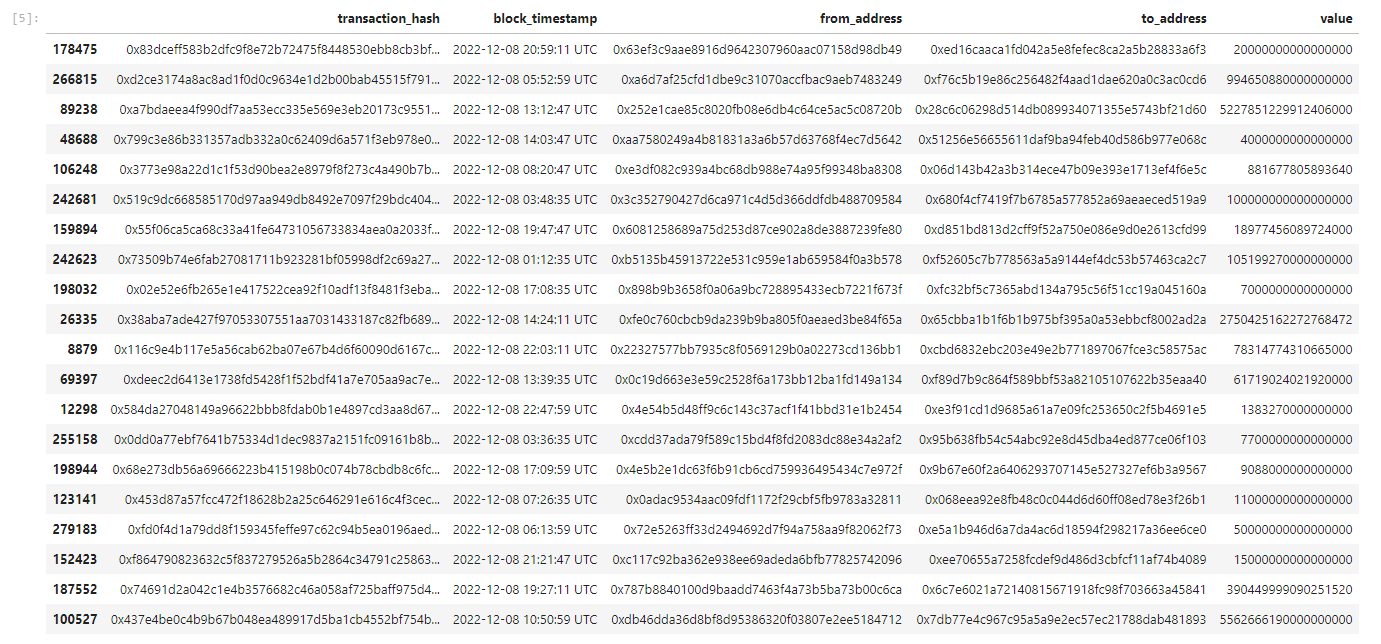

### What Is Blockchain?
A blockchain is a digital, decentralised, trusted public ledger of transactions between individuals. That is, everyone can transact and record these actions on a public record for each other to verify and view, with no single person authorising or notarising the transactions.

Explaining _exactly_ what a blockchain is and how it works outside the scope of this keynote. For this sake of this presentation, just assume that it is a public record of transactions between individuals. 

### How To Read Ledger Data
A blockchain is designed to be append-only and immutable. Each row corresponds to a "state change" on the network. it is possible to construct the entire state of the network at any point in time by replaying the recorded transactions prior to that point.

For ETH transfers, this state change is simply the exchange of the native token. In a later chapter I'll explain how users can do more complicated actions than this. 

A lot of data is contained in each transaction. However, for our purposes, I've filtered the data down to the most relevant columns:

- `transaction_hash` - this is the unique identifier for this transaction. This allows users to lookup individual addresses to verify transactions.
- `block_timestamp` - this is the timestamp where the transaction was finalised and posted on-chain. 
- `from_address` - the address who initiated the transfer. They are sending the ETH.
- `to_address` - the address who is receiving the ETH.
- `value` - the amount of ETH being sent, expressed in wei ($10^{-18}$ ETH).

Here is a more visual representation of an ETH transfer on Etherscan, a free block explorer.

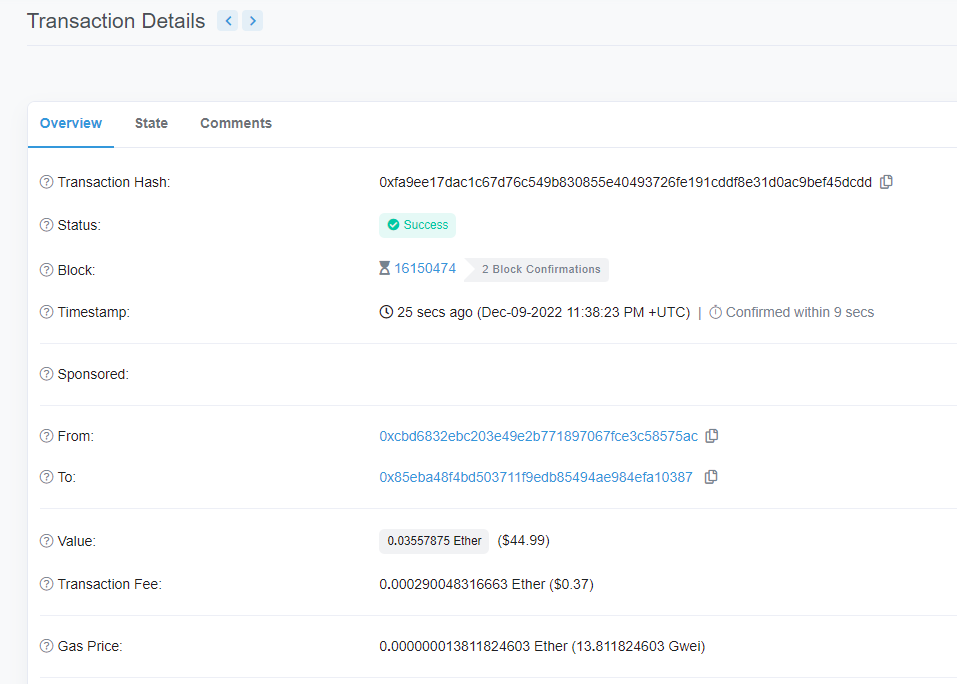

### Decoding ETH Transfers
Fortunately, due to the native support for ethereum transfers, there is no additional work required to get this data out of the network.

All we need to do is filter our data to transactions where the `value > 0`. It is possible for there to be no exchange in ETH and still have a transaction. I explain this in the next chapter. 

In [1]:
import pandas as pd

transactions = pd.read_csv('data/transactions.csv')
transactions = (
    transactions
    .sort_values(by='block_timestamp')
    .reset_index(drop=True)
)
transactions = transactions[transactions.value.astype(float) > 0]
transactions = transactions[[
    'transaction_hash', 
    'block_timestamp', 
    'from_address', 
    'to_address', 
    'value'
]]

transactions

,transaction_hash,block_timestamp,from_address,to_address,value
0,0xe19cd7573f8c2c8df2c0e55825d4414909e4357d7d8c...,2022-12-08 00:00:11 UTC,0x187d6e8741af35c45198ebec83905eb23e742b15,0x425c70ca206c53e19997b5e57277190856eb069a,81268281669362810
2,0xcd84aa37b641cba7a4e89b3ae0a84b25348620372f84...,2022-12-08 00:00:11 UTC,0x3aee6ff6cd358412046d511a768a852c38b0e046,0x6518d01480f95f4a31ec6c1e2edc4cc4c9aaf041,36000000000000000
4,0x354fa7f650aeb1054157b6d2b53f0e157c5fa53cb490...,2022-12-08 00:00:11 UTC,0x2db9d07c9c161f9c294be1b7acd10791e5c3f78f,0xcbd6832ebc203e49e2b771897067fce3c58575ac,246679002397249000
5,0x641ebdb5158fb2b7f39db88f3fc8b372010e14f9fe18...,2022-12-08 00:00:11 UTC,0x46340b20830761efd32832a74d7169b29feb9758,0x0dcd4468f3ba35a20b32049c659eb3e62de443b5,51190000000000000
6,0xa438207c60627960047f4a6fe0825d0b54deb2b0716e...,2022-12-08 00:00:11 UTC,0x46340b20830761efd32832a74d7169b29feb9758,0xf810ef4979b4813f47a1f1afe8ea1811f7ef1117,239470000000000000
...,...,...,...,...,...
292815,0x83261a53fa03844df2807316043ca05f18108089c12f...,2022-12-09 00:14:23 UTC,0xac4367a75433761011e84d2e23d97d501ff72d13,0xbb10f88c2072b821d8d528aff722afe4ad4331b2,2000000000000000000
292816,0x52643df66baf5e7e078d50d8fc899d6fcccb09e613aa...,2022-12-09 00:14:23 UTC,0xc0ee6beee2c82d54fedae0e67bfb105b5139b045,0x8adb1048bdb524c625a023b22fc37ef553ea4a2b,3345554981830742
292817,0xc70d5cf0f6bfe631c4154adddea3d8dedf8d458b6873...,2022-12-09 00:14:23 UTC,0xa7827bd8e0e50bf00d7e29567d7e8e16a8c0b7ec,0x6a0eafaef6d79e7ebdba6e3e101712aefdc3f472,129800000000000000
292818,0x9279b55f9d7812bd038f573501b04184e60d4aca72ed...,2022-12-09 00:14:23 UTC,0x69fcc201cdb384e87843ead4f5519ec91a41269a,0x84243c3f33bb1d9e8e86b50279d630e6d37773b2,49698736372247000


In [2]:
transactions[
    (transactions.to_address == '0x0022ae67605e018894cd7ce2893792ccad9c1a00') 
    | (transactions.from_address == '0x0022ae67605e018894cd7ce2893792ccad9c1a00')
].sort_values(by='block_timestamp', ascending=False)

,transaction_hash,block_timestamp,from_address,to_address,value
208828,0xf2ffe7cfc60b277b43bcc02e885a124e5cbfee051e2b...,2022-12-08 17:46:47 UTC,0x0022ae67605e018894cd7ce2893792ccad9c1a00,0xf89d7b9c864f589bbf53a82105107622b35eaa40,101343430000000000
176608,0x0357ae3eea360f99f13104cc24a80f5bf59370fefe29...,2022-12-08 15:35:35 UTC,0x28c6c06298d514db089934071355e5743bf21d60,0x0022ae67605e018894cd7ce2893792ccad9c1a00,105777090000000000
173872,0x796ce8d214d9020305a6390fbac5ca15421c4c287f11...,2022-12-08 15:24:11 UTC,0x4976a4a02f38326660d17bf34b431dc6e2eb2327,0x0022ae67605e018894cd7ce2893792ccad9c1a00,23566340000000000


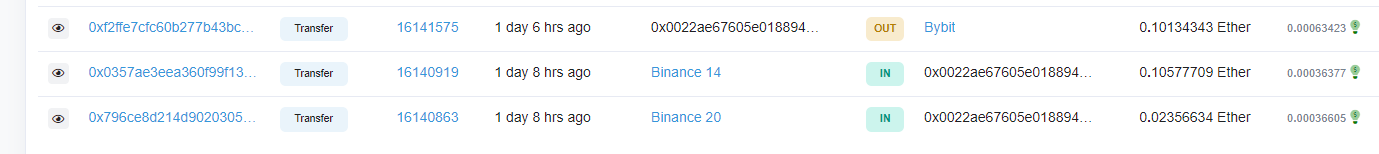

## Chapter 2: USDC Transfer

Let's now try to find our USDC transfers. Here are some transfers in our ledger of USDC:

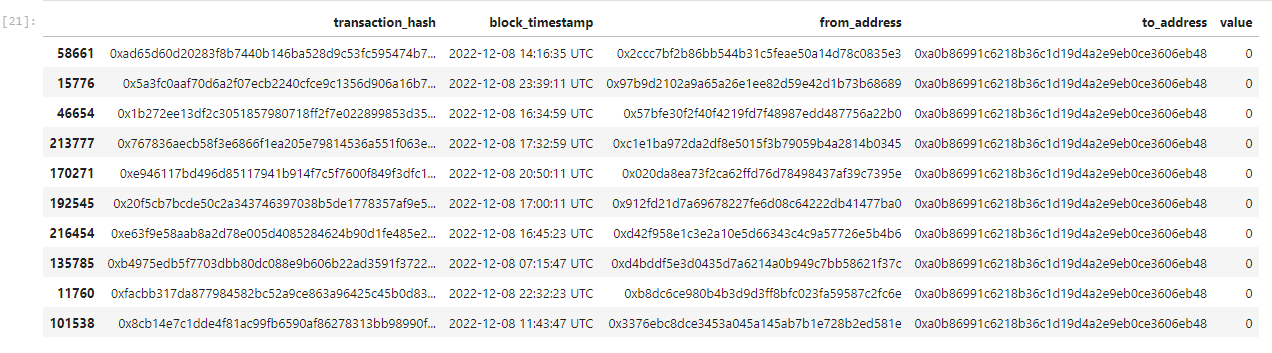

Huh?! How can there be no value transfered in these transactions! And why is the `to_address` always the same? There is more than meets the eye here... 

### Introduction To Smart Contracts
For us to understand what's going on with our USDC transfers, we will need to understand what a **smart contract** is.

A smart contract is an immutable, autonomous piece of code that exists on-chain. Think of it being like a script that you've uploaded to AWS that you can never change, and anyone who wants to interact with your code needs to pay to run it. It isn't a perfect analogy, but it's a pretty close one!

Smart contracts can do pretty much anything. Solidity, the most popular smart contract programming language, is turing complete and can be used to solve any problem imaginable.

USDC is actually a _smart contract_ rather than some kind of "native token" like ETH is. We just consider the smart contract like a token. We will need to then look into the smart contract to get information about the transfer of the USDC assets, rather than the `value` attribute in the transaction.

### Introduction To the EVM & ABIs
The Ethereum Blockchain expresses its smart contracts as _bytecode_ which is then run on the _Ethereum Virtual Machine_. This is very similar to the way the Java Virtual Machine works. This grants it a lot of flexibility when it comes to programming languages and gives interoperability betweeen contracts written in different languages (e.g. Solidity vs. Vyper). Today we love Solidity, but we may one day rely on a higher-level langauge for our smart contract programming purposes.

This bytecode, however, is effectively incomprehensible once it gets compiled and posted on-chain. We define the interface of contracts using an **application binary interface**, or an ABI as it is more commonly known as. ABIs aren't a unique concept. Most hardware systems specify ABIs, most notably CPUs with their operation codes (e.g. submit a binary command of `1001010` to register a value into memory).

We can retrieve USDC's ABI via Etherscan. This is commonly how most developers share their ABIs on the internet.

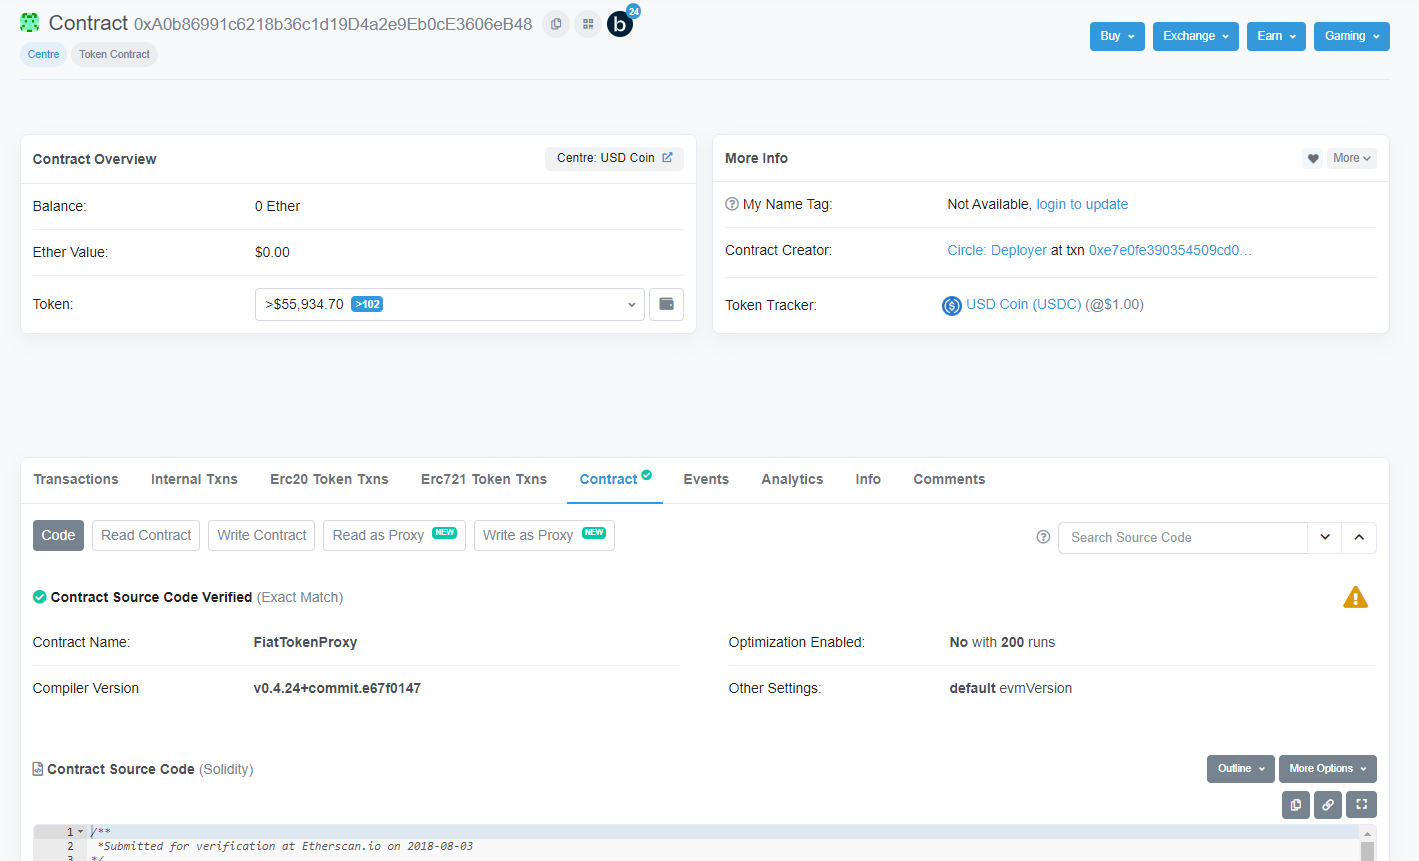

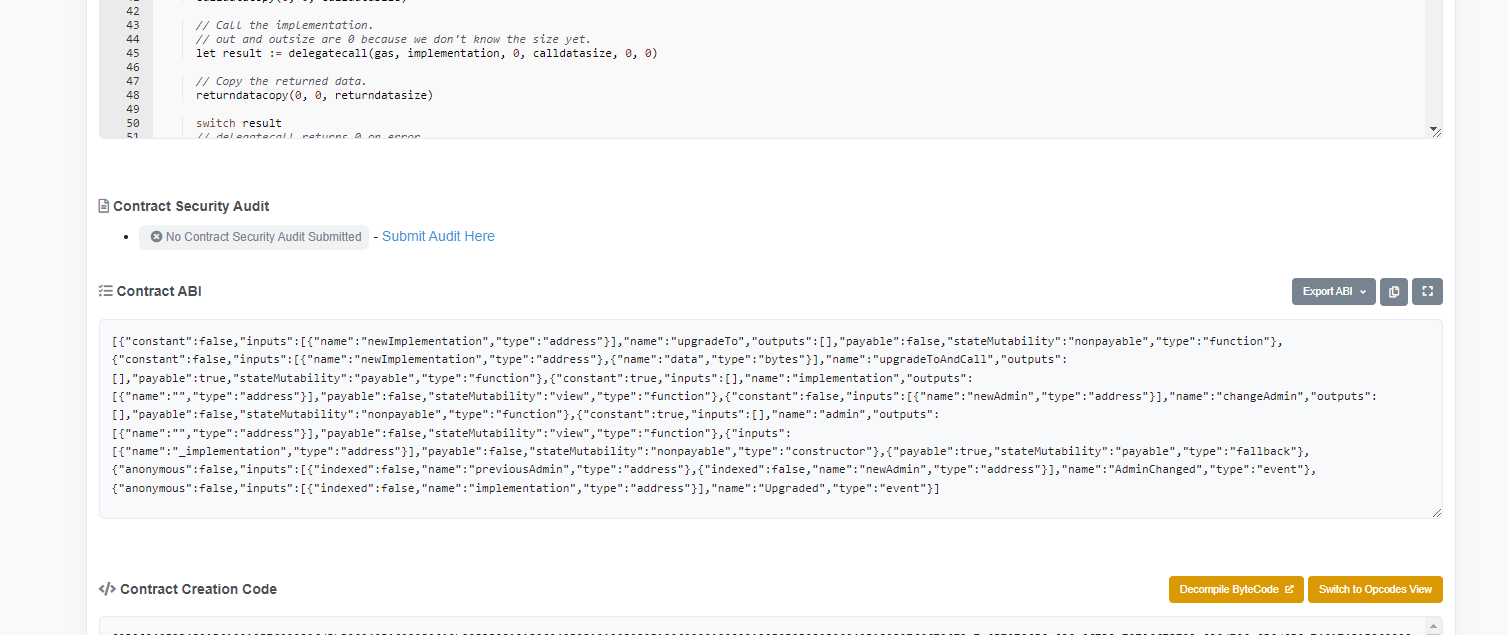

Here is an example of how the `transfer` method is defined in the ABI:

```json
{
    "inputs": [
      { "internalType": "address", "name": "to", "type": "address" },
      { "internalType": "uint256", "name": "value", "type": "uint256" }
    ],
    "name": "transfer",
    "outputs": [{ "internalType": "bool", "name": "", "type": "bool" }],
    "stateMutability": "nonpayable",
    "type": "function"
}
```

### Logs & Events
The last concept to introduce before moving onto our worked example is the idea of **logs**.

Smart contracts have the ability to notify other actors on the network via a standard publisher/subscriber model. This is done through the concept of event logs. An event log is just a structure message that is easily decoded and monitored by other actors on the network without having to poll the entire network for transactions they care about.

You can think of a log as being structured like so:

```json
{
    "topics": ["0x123", "0x456", "0x789", ...],
    "data": "0x1234567890abcdef..."
}
```

The entirety of the log message can be decoded using these two attributes. The `topics` are a special, indexable array of values that can be easily watched by Ethereum clients. They store data that subscribers typically care about, such as the `to` and `from` address of a transfer. The `data` is all other information that typically is of lesser importance, and will be decoded by the client if this was an event message they care about. 

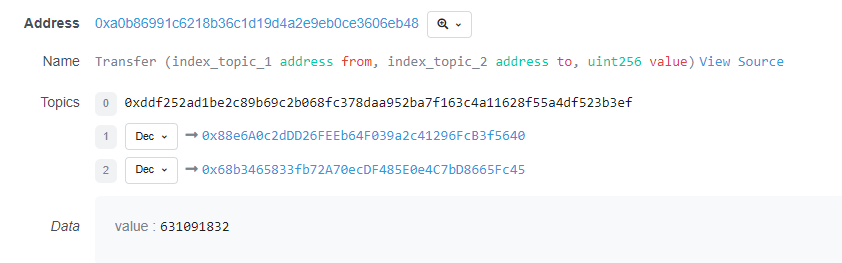

It is a common practice to use the first topic (`topics[0]`) as the _signature_ of the event. This signature is a special hash applied over the Event and its parameters. This makes it easier for clients to listen to just that event.

### Decoding USDC Transfers
Now we know all of the prerequisite theory, we can decode our USDC events!

For USDC, we just want the `Transfer` event as this is the equivalent to a `value` transfer for ETH. This event has a topic0 hash of `0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef`. This transfer event contains the following information:

- `to` - the address sending the USDC
- `from` - the address receiving the USDC
- `value` - the amount of the asset being sent. For USDC, this is expressed 
  in $10^{-8}$.

In [3]:
import eth_event

class Decoder:
    
    def __init__(self, address: str, abi: dict):
        self.address = address
        self.abi = abi
        self.topic_map = eth_event.get_topic_map(self.abi)
        
    def __call__(self, topics: list, data: str) -> dict:
        try:
            decoded = eth_event.decode_log(
                {
                    'address': self.address,
                    'topics': topics,
                    'data': data,
                },
                self.topic_map
            )
        except eth_event.EventError as exc:
            raise exc
            return {}
        else: 
            return {arg['name']: arg['value'] for arg in decoded['data']}

In [4]:
import json

USDC_CONTRACT_ADDRESS = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'
TRANSFER_TOPIC0 = '0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'

with open("abis/usdc.abi.json") as f:
    USDC_ABI = json.load(f)

USDC_DECODER = Decoder(
    address = USDC_CONTRACT_ADDRESS,
    abi = USDC_ABI,
)

In [5]:
import pandas as pd

logs = pd.read_json('data/logs.jsonlines', orient='records', lines=True)
logs = logs.sort_values(by='block_timestamp')

## Extract topic0 & filter data
logs['topic0'] = logs.topics.apply(lambda x: x[0])
logs = (
        logs[
        (logs.address == USDC_CONTRACT_ADDRESS) 
        & (logs.topic0 == TRANSFER_TOPIC0)
    ]
    .reset_index(drop=True)
)

## Decode logs & merge back onto data
logs = pd.concat([
    logs, 
    logs.apply(
        lambda s: USDC_DECODER(s.topics, s.data), 
        axis=1, 
        result_type='expand'
    )
], axis=1)

## Select relevant columns
logs = logs[['transaction_hash', 'block_timestamp', 'from', 'to', 'value']]
logs

,transaction_hash,block_timestamp,from,to,value
0,0x420f68174c731b9836d8ec8168456d048d9383756155...,2022-12-08 00:00:11 UTC,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0xb39703299652f9f54cc819e1f5f56050097a1ca9,50000000
1,0x441f635ca610e30145e9d08a7f05144fd6591c58ede6...,2022-12-08 00:00:11 UTC,0x3b17056cc4439c61cea41fe1c9f517af75a978f7,0x1111111254eeb25477b68fb85ed929f73a960582,2982651858
2,0x441f635ca610e30145e9d08a7f05144fd6591c58ede6...,2022-12-08 00:00:11 UTC,0x1111111254eeb25477b68fb85ed929f73a960582,0x365758889a1d892fd4ca2c863c70693ac7007659,2982651858
3,0xcb9e71de7d21f87ab68ccd3e21aaac4da396d6762dc2...,2022-12-08 00:00:11 UTC,0xf4a12bc4596e1c3e19d512f76325b52d72d375cf,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,820000000
4,0xd888d9475624af246fb9a9ac0f93592eb591aa98bd24...,2022-12-08 00:00:11 UTC,0x67e478ce94a20dde1d6d75fdcb16889d6988ed9e,0xa205fd7344656c72fdc645b72faf5a3de0b3e825,186261938448
...,...,...,...,...,...
74291,0x5ff71baa0e352bb0bc33b02e5d1717a8f372f6f3bb67...,2022-12-09 00:28:35 UTC,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0x684b00a5773679f88598a19976fbeb25a68e9a5f,757562284
74292,0xf3f38e8363bec75034fd0a2a2b620c835bdda35d41b5...,2022-12-09 00:28:35 UTC,0x0472a45ebb948c50a38037e4e6676ee613e959ec,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,200000000
74293,0x037ff3f1771713df097026da53617506964640e0413e...,2022-12-09 00:28:35 UTC,0x05104ebba2b6d3b8254aa41cf6df80462f6160ae,0xe0554a476a092703abdb3ef35c80e0d76d32939f,1859325702
74294,0x7c826139458497ab61e3812fc3bd52632d297c8b0431...,2022-12-09 00:28:35 UTC,0x2839afe77827461c9c5b2a4a9d2157c55ff0cb8a,0x415d2fc156d451b84026115cc3098b6a98dff653,31000000


In [6]:
logs[logs.transaction_hash == '0x3badabb5347f609b62e045bee7f1e5bc3c51282d1ace55bc38e816d2f1911a10'].T

,71999
transaction_hash,0x3badabb5347f609b62e045bee7f1e5bc3c51282d1ace...
block_timestamp,2022-12-08 23:34:47 UTC
from,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc
to,0xf0e66ec47608b99c6378e28fe395590d989b283e
value,186575262


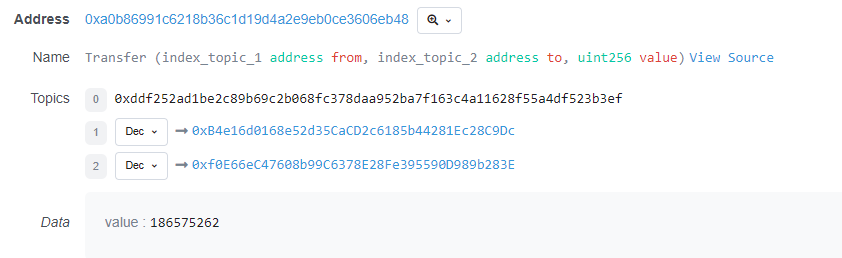

## Chapter 3: BAYC Transfers
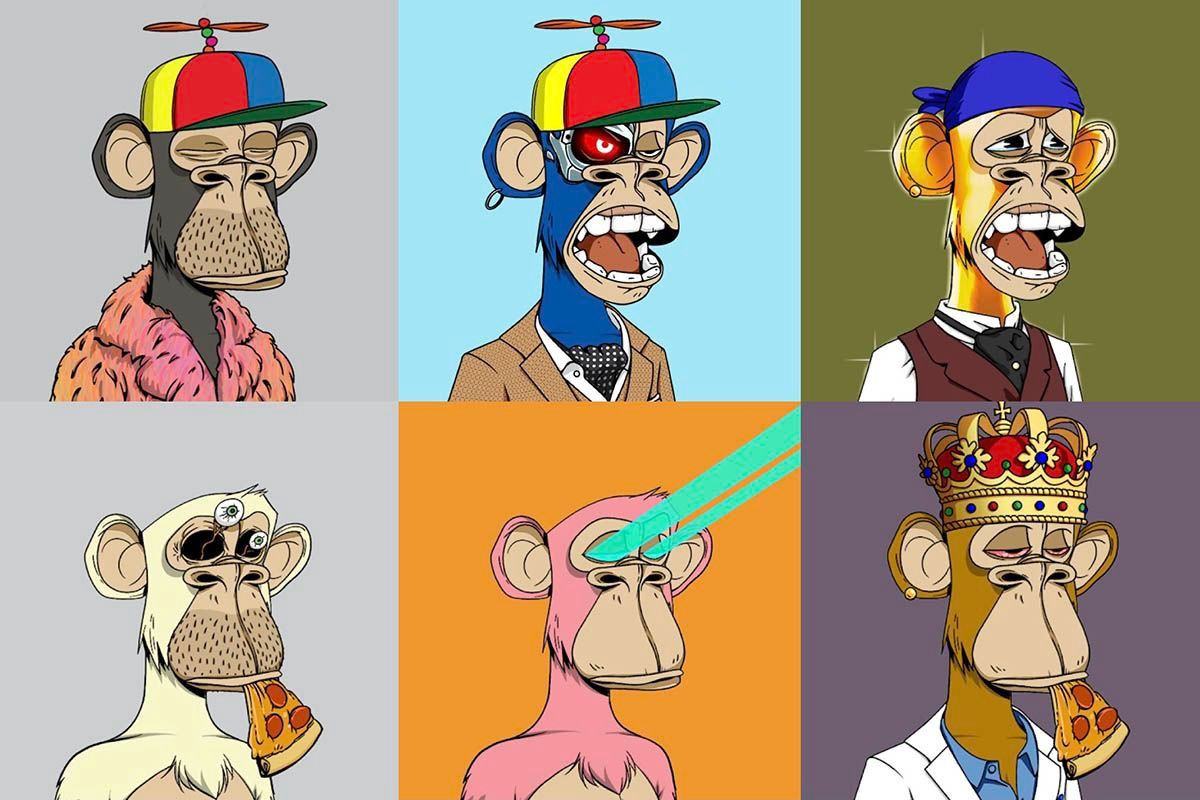

### Decoding BAYC Transfers
We can find the transfers of BAYC NFTs in a fairly similar way to the way we decoded our USDC transfers. The only key difference is now that the tokens aren't _fungible_, and we need to consider the ID of the asset being sent around.

Again, here we will need to get the BAYC contract address and ABI. Fortunately for us, BAYC also use the standard `Transfer` event with the same topic0 hash. 

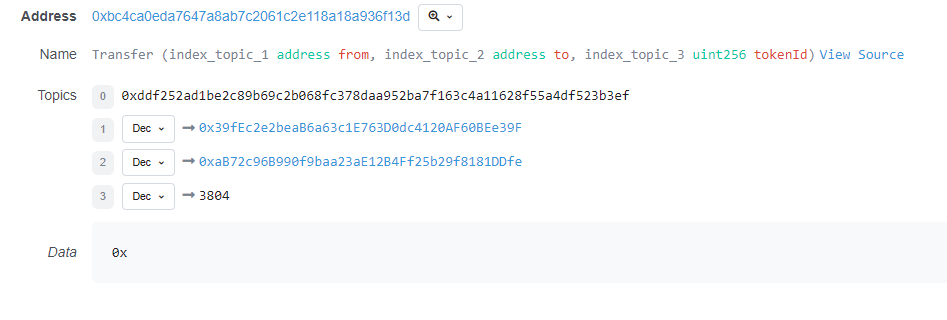

P.S. For those paying attention, you might notice that the event signature of the Transfer event is actually different to USDC, but the topic0 hash is the same! This is because the event signature is done on the _types_ and not the variable names.

In [7]:
BAYC_CONTRACT_ADDRESS = '0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d'
TRANSFER_TOPIC0 = '0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef'

with open("abis/bayc.abi.json") as f:
    BAYC_ABI = json.load(f)
    
BAYC_DECODER = Decoder(
    address = BAYC_CONTRACT_ADDRESS,
    abi = BAYC_ABI,
)

In [8]:
import pandas as pd

logs = pd.read_json('data/logs.jsonlines', orient='records', lines=True)
logs = logs.sort_values(by='block_timestamp')

## Extract topic0 & filter data
logs['topic0'] = logs.topics.apply(lambda x: x[0])
logs = (
    logs[
        (logs.address == BAYC_CONTRACT_ADDRESS) 
        & (logs.topic0 == TRANSFER_TOPIC0)
    ]
    .reset_index(drop=True)
)

## Decode logs & merge back onto data
logs = pd.concat([
    logs, 
    logs.apply(
        lambda s: BAYC_DECODER(s.topics, s.data),
        axis=1, 
        result_type='expand'
    )
], axis=1)

## Select relevant columns
logs = logs[['transaction_hash', 'block_timestamp', 'from', 'to', 'tokenId']]
logs

,transaction_hash,block_timestamp,from,to,tokenId
0,0xb80b4f3049a3510101adf54dd7d8ce3904e739633e4d...,2022-12-08 00:24:59 UTC,0x8eea79f9c6da7e8a8a41efdbbfd947f4326a901e,0xc6021b536a50f8c3b5ed7e13a31a8bcf232c1688,1131
1,0xa5556836b073704507bd97bd2dc7063c43ad9b291416...,2022-12-08 00:26:35 UTC,0x8eea79f9c6da7e8a8a41efdbbfd947f4326a901e,0xc6021b536a50f8c3b5ed7e13a31a8bcf232c1688,2014
2,0xba08c69c7bfceb797d43c60d1160880f0832027dc3c5...,2022-12-08 00:26:59 UTC,0x8eea79f9c6da7e8a8a41efdbbfd947f4326a901e,0xc6021b536a50f8c3b5ed7e13a31a8bcf232c1688,5383
3,0x499aabc7f31976cc7380388820ab9f6a54a6bfc29c58...,2022-12-08 00:27:23 UTC,0x8eea79f9c6da7e8a8a41efdbbfd947f4326a901e,0xc6021b536a50f8c3b5ed7e13a31a8bcf232c1688,9285
4,0x777dfe58067985810f0fa2dd76432626dc4af62ce33d...,2022-12-08 00:29:47 UTC,0xc6021b536a50f8c3b5ed7e13a31a8bcf232c1688,0x8eea79f9c6da7e8a8a41efdbbfd947f4326a901e,5383
...,...,...,...,...,...
264,0x8c63012d20a0d3d74555437e86af9feb98bc7c54f1dc...,2022-12-09 00:23:59 UTC,0xf3e4fdd7c3eed209040f73f6ce073dfdb5256069,0x8ae57a027c63fca8070d1bf38622321de8004c67,8114
265,0xde212f337f16be84ca774e675b7f6c38988632955003...,2022-12-09 00:25:59 UTC,0x8ae57a027c63fca8070d1bf38622321de8004c67,0xf3e4fdd7c3eed209040f73f6ce073dfdb5256069,8114
266,0xf193c938c1acf70f3a112531fd1da989948c44869362...,2022-12-09 00:26:59 UTC,0xf3e4fdd7c3eed209040f73f6ce073dfdb5256069,0xe3fc637af794eda27f66022938cda18786899d41,8114
267,0xa1b0e9b51617c40af15ea6ff222ac9a69689352b34bd...,2022-12-09 00:28:11 UTC,0xe3fc637af794eda27f66022938cda18786899d41,0xf3e4fdd7c3eed209040f73f6ce073dfdb5256069,8374


In [9]:
logs.query('tokenId == 8114')

,transaction_hash,block_timestamp,from,to,tokenId
263,0xc3b5fc39fcd334075e4b933e23b0c25a4744d68504c2...,2022-12-09 00:21:59 UTC,0xe3fc637af794eda27f66022938cda18786899d41,0xf3e4fdd7c3eed209040f73f6ce073dfdb5256069,8114
264,0x8c63012d20a0d3d74555437e86af9feb98bc7c54f1dc...,2022-12-09 00:23:59 UTC,0xf3e4fdd7c3eed209040f73f6ce073dfdb5256069,0x8ae57a027c63fca8070d1bf38622321de8004c67,8114
265,0xde212f337f16be84ca774e675b7f6c38988632955003...,2022-12-09 00:25:59 UTC,0x8ae57a027c63fca8070d1bf38622321de8004c67,0xf3e4fdd7c3eed209040f73f6ce073dfdb5256069,8114
266,0xf193c938c1acf70f3a112531fd1da989948c44869362...,2022-12-09 00:26:59 UTC,0xf3e4fdd7c3eed209040f73f6ce073dfdb5256069,0xe3fc637af794eda27f66022938cda18786899d41,8114


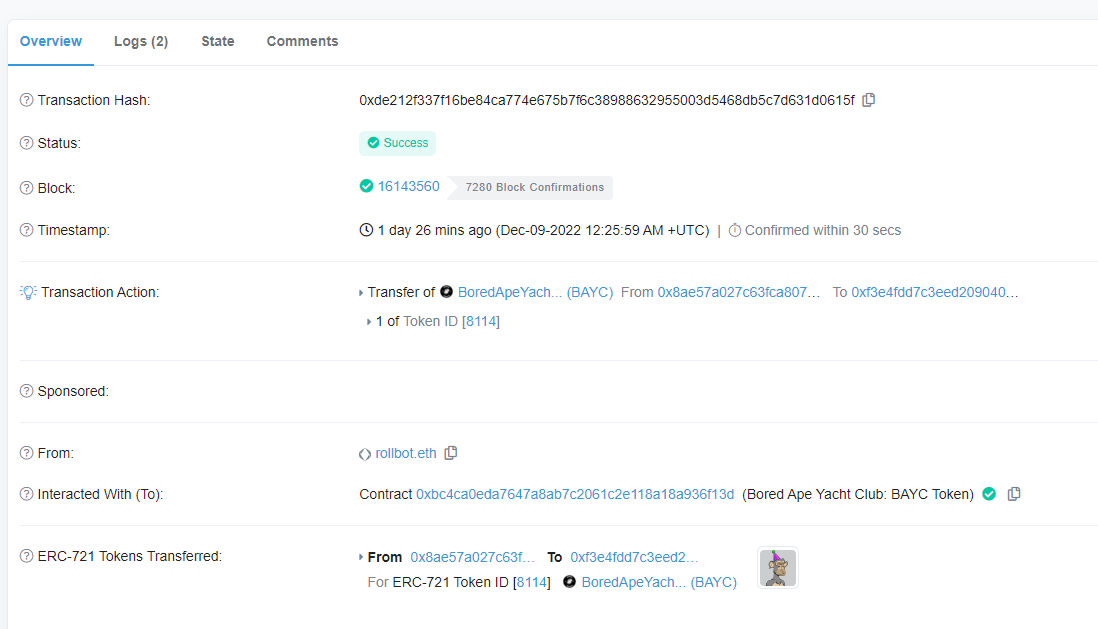

## Conclusion
You've now seen how you can pull information from the ledger, even if it's
encoded. There are plenty more interesting examples on chain. There is data for
basically any type of sophisticated financial product (exchanges, options, 
perpetuals, index funds, etc.). I encourage you to dive in and play around with
some data and learn more about the space.

Who knows - you could be the next big innovator in the space!

**Any questions?**